<img src="https://faculty.washington.edu/pmacc/LO/Figs/splash.png" align="right">

# Timing blooms in Live Ocean predictions

Here we will consider examine phyto and zooplankton dynamics, and see what we can learn about their spatial and temporal charateristics, and see if there are any strong correlations with environmental variables such as wind, or tidal fluctuations.

Recall from prior exercises the details about Live Ocean below:

Live Ocean is a ROMS circulation model (https://www.myroms.org/) developed and maintained by University of Washington

Take a look at the model description on https://faculty.washington.edu/pmacc/LO/LiveOcean.html and in Sutherland 2011 et al

All the model predictions are in our shared Google Drive <br>
<i>ESCI491/LiveOceanModelPredictions/</i>

You can see the locations by opening the kml in Google Earth
<i>ROMS_VirtualBuoys.kml</i>

If you don't have access to Google Earth you can open it in Caltopo, https://caltopo.com/map.html . Just go to Import -> Choose Files -> Choose the kml you downloaded from Google Drive


In [11]:
# First we import the packages we want to use, note we must install netcdf4
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
!pip install netcdf4

In [12]:
# As usual, Connect to your drive, follow the instructions
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Then of course navigate to your script, note I'm use the os package here
os.chdir('/content/drive/My Drive/Colab Notebooks/ESCI491')
os.listdir()

['Upwelling',
 'RiverDischarge',
 'BellinghamWaveBuoy',
 'BellinghamOrcaBuoy',
 'LiveOceanModelPredictions',
 '01_CrosbyColabIntro',
 '04_ErrorMetrics',
 '02_NDBCWaveWindAnalysis',
 '03_PlotLiveOceanVirtualMooring.ipynb',
 '03b_PlotLiveOceanVirtualMooring_Activity.ipynb',
 'PlanktonDiagram.gslides',
 '05_DownloadAndPlotBellinghamWindSensor.ipynb',
 '03c_PlotLiveOceanVirtualMooring.ipynb']

In [0]:
# Now, relative to where your script is, create the path and name to the file your interested in.
fname1 = 'LiveOceanModelPredictions/seattle_hourly.nc'
fname2 = 'LiveOceanModelPredictions/bellinghamBayBuoySite_hourly.nc'
fname3 = 'LiveOceanModelPredictions/admiraltySouth_hourly.nc'

In [0]:
# Here let's write a function to load in and pre-process our dataset
def load_nc(fname):
  ds = xr.open_dataset(fname)
  ds = ds.transpose('s_rho', 'ocean_time', 's_w', 'scalar')
  ds['s_rho']=ds['z_rho'].mean(dim='ocean_time')
  ds['s_rho'].attrs = {'long_name': 'Elevation', 'units': 'm'}  
  return ds

In [0]:
# Now let's use our function to load our chosen locations
ds1 = load_nc(fname1)
ds2 = load_nc(fname2)
ds3 = load_nc(fname3)

Text(0.5, 1.0, 'Admiratly Inlet')

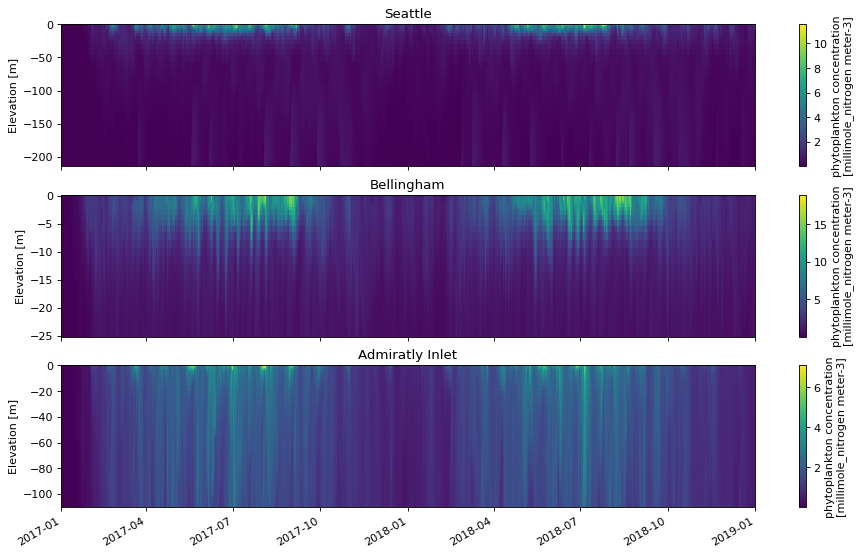

In [18]:
# Let's see what the phytoplankton distributions look like
f = plt.figure(num=None, figsize=(14,8), dpi=80)
(ax1, ax2, ax3) = f.subplots(3, 1, sharex=True)
plt.sca(ax1)
ds1['phytoplankton'].plot()
plt.xlabel('')
plt.title('Seattle')
plt.sca(ax2)
ds2['phytoplankton'].plot()
plt.xlabel('')
plt.title('Bellingham')
plt.sca(ax3)
ds3['phytoplankton'].plot()
plt.xlabel('')
plt.title('Admiratly Inlet')

# I reccomend png format for spatial figures, and pdf for line figures
f.savefig('TimeSeriesPlankton3Stations.png') # <- Notice here, I'm saving my figure as a png. 

### What do you notice above?
Look at the comparison of phytoplankton distributions at the 3-sites and hypothesize why 
1. The color axes are different, where are blooms stronger
2. The distribution with depth is quite different (note the axes)
3. The variation through time is different

Later watch this video with spatial detail of plankton blooms over a year, https://faculty.washington.edu/pmacc/LO/phytoplankton_year.html

### Activity - A more detailed look
Follow the steps below to look closer at the dynamics. What kind of relationships between variables do you see, do they hold at each location, or do they work at some locations and not others?

Text(0.5, 1.0, 'Surface Layer')

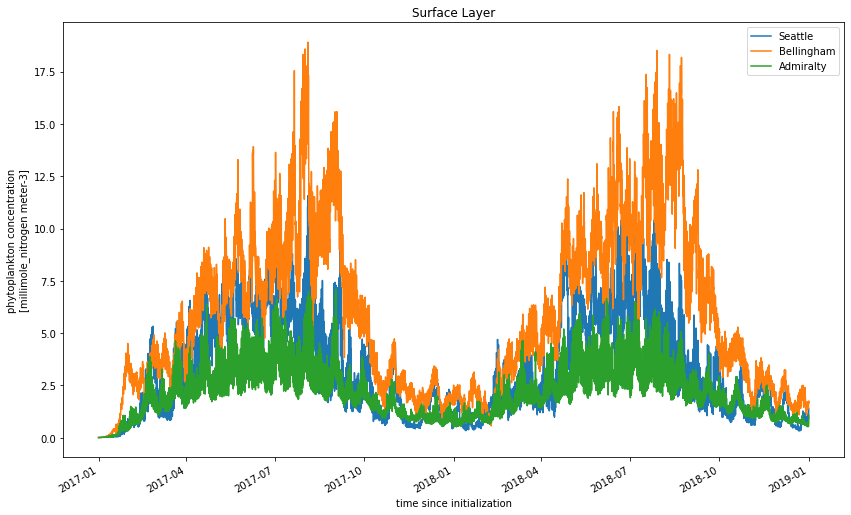

In [20]:
# First let's consider just surface plankton, notice the use of isel() instead of sel()
s1 = ds1['phytoplankton'].sel(s_rho=0, method='nearest')
s2 = ds2['phytoplankton'].sel(s_rho=0, method='nearest')
s3 = ds3['phytoplankton'].sel(s_rho=0, method='nearest')

f = plt.figure(num=None, figsize=(14,8))
s1.plot(label='Seattle')
s2.plot(label='Bellingham')
s3.plot(label='Admiralty')
plt.legend()
plt.title('Surface Layer')

### Part 1
1. Make a 4-panel plot of zeta, surface N03, surface phytoplankton, surface zooplankton
2. Make this plot for each of our 3-sites.

Do you observe any relations between these variables? Are plankton blooms more likely during Neap tides? Can you tell?

In [24]:
#ds1.keys()
#ds1['zeta'].plot()
ds1['phytoplankton'].attrs

{'long_name': 'phytoplankton concentration',
 'units': 'millimole_nitrogen meter-3'}

In [0]:
# Write your code below, Site 1: Seattle

f = plt.figure(num=None, figsize=(14,8))
(ax1, ax2, ax3, ax4) = f.subplots(4, 1, sharex=True)



In [0]:
# Write your code below, Site 2: Bellingham




In [0]:
# Write your code below, Site 3: Admiratly



### Part 2

1. Re-plot your above results zooming into a single month, for example May, when blooms start. Use slice as we have before
2. Change your y-labels to make them look nicer, you can use attrs to get details of each variable

Zooming in time, are the relationships more clear? Try looking after different months if you can't see a relation between the variables.

In [0]:
# Starting Date
sdate = '2018-05-01'
# Ending Date
edate = '2018-06-01'
# Example selecting surface and summer
no3_surf_summer = ds1['NO3'].sel(s_rho=0, method='nearest').sel(ocean_time=slice(sdate,edate))




In [25]:
# To get the attributes of a variable, including the units use
ds1['phytoplankton'].attrs

{'long_name': 'phytoplankton concentration',
 'units': 'millimole_nitrogen meter-3'}